In [49]:
# import thư viện pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# load dataset và xem 5 dòng đầu tiên 
df = pd.read_csv('/content/california_cities.csv')
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [51]:
# xem thông tin dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


- Có tổng cộng 482 cities ở tiểu bang California.

# Data analysis

## Population

In [79]:
print('California có tổng dân số là: {a} người'.format(a=np.sum(df['population_total'])))

California có tổng dân số là: 31427695 người


In [52]:
df[ np.logical_or(df['population_total'] == df['population_total'].max(),
                  df['population_total'] == df['population_total'].min())
  ][['city','population_total']]

,city,population_total
239,LosAngeles,3884307
448,Vernon,112


- Los Angeles có dân số đông nhất: 3884307 dân
- Vernon có dân số thấp nhất: 112 dân

In [53]:
df[['population_total']].agg(pop_mean = ('population_total', 'mean'), pop_median = ('population_total', 'median'))

,population_total
pop_mean,65202.686722
pop_median,29155.500000


- Dân số trung bình của tiểu bang California là 65203, trung vị là 29156 (241 thành phố có dân số thấp hơn 29156)

In [57]:
# tạo cột mật độ dân số = population / area
df['pop_density'] = df['population_total']/df['area_land_km2']

In [68]:
df[ np.logical_or(df['pop_density'] == df['pop_density'].max(),
                  df['pop_density'] == df['pop_density'].min())
  ][['city','pop_density']]

,city,pop_density
190,Industry,7.175152
253,Maywood,8976.081258


- Maywood có mật độ dân số cao nhất: 8976 (p/km$^2$)
- Industry có mật độ dân số thấp nhất: 7 (p/km$^2$)

In [71]:
# tạo cột phần trăm dân số của từng city so với tổng dân số của bang California
df['pop_percent'] = (df['population_total'] / np.sum(df['population_total']))*100

In [78]:
df[df['pop_percent']> 1].reset_index()

,index,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,pop_density,pop_percent
0,9,9,Anaheim,33.836111,-117.889722,48.0,157.0,336000,50.811,49.835,0.976,131.600,129.073,2.527,1.92,2603.178047,1.069121
1,26,26,Bakersfield,35.366667,-119.016667,NaN,404.0,347483,143.609,142.164,1.445,371.946,368.204,3.742,1.01,943.724131,1.105659
2,150,150,Fresno,36.750000,-119.766667,NaN,308.0,509039,112.308,111.957,0.351,290.877,289.967,0.910,0.31,1755.506661,1.619715
3,234,234,LongBeach,33.768333,-118.195556,NaN,0.0,462257,51.437,50.293,1.144,133.223,130.259,2.964,2.22,3548.752869,1.470859
4,239,239,LosAngeles,34.050000,-118.250000,71.0,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70,3199.593904,12.359503
5,290,290,Oakland,37.804444,-122.270833,NaN,43.0,406253,78.002,55.786,22.216,202.024,144.485,57.540,28.48,2811.731322,1.292659
6,359,359,Sacramento,38.555556,-121.468889,9.0,30.0,466488,100.105,97.915,2.190,259.273,253.600,5.673,2.19,1839.463722,1.484321
7,367,367,SanDiego,32.715000,-117.162500,6.0,3.0,1345895,372.400,325.190,47.210,964.510,842.230,122.270,12.68,1598.013607,4.282513
8,370,370,SanFrancisco,37.783333,-122.416667,NaN,52.0,837442,231.890,46.870,185.020,NaN,NaN,NaN,80.00,NaN,2.664662
9,375,375,SanJose,37.333333,-121.900000,26.0,NaN,1000536,179.970,176.526,3.439,466.109,457.201,8.908,1.91,2188.394164,3.183612


- Có 11 thành phố với dân số chiếm hơn 1% dân số của tiểu bang California

## Area

In [86]:
print('California có diện tích đất liền là {a} km\u00B2'.format(a=np.sum(df['area_land_km2'])))

California có diện tích đất liền là 20815.476 km²


In [83]:
df[ np.logical_or(df['area_land_km2'] == df['area_land_km2'].max(),
                  df['area_land_km2'] == df['area_land_km2'].min())
  ][['city','area_land_km2']]

,city,area_land_km2
7,AmadorCity,0.813
239,LosAngeles,1214.000


- Los Angeles có diện tích lớn nhất: 1214 km$^2$
- Amador City có diện tích bé nhất: 0.813 km$^2$

# Population vs Area Distribution Visualization

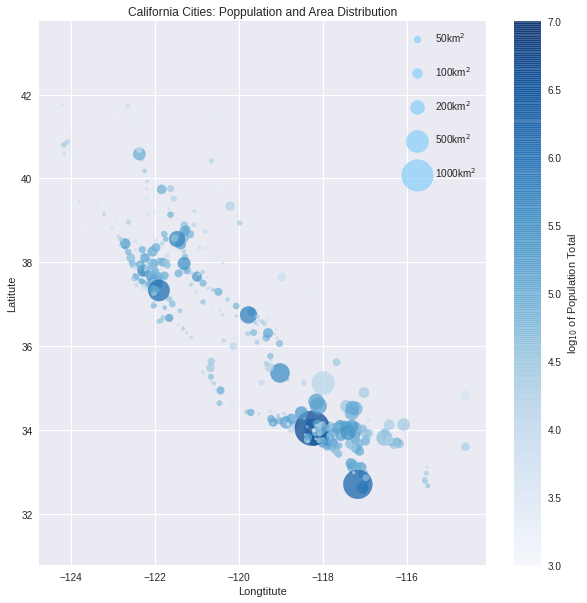

In [87]:
# Visualization
plt.style.use('seaborn')
plt.figure(figsize=(10,10))

plt.scatter(df['longd'],df['latd'],
            c=np.log10(df['population_total']), cmap='Blues',
            s=df['area_land_km2'],alpha = 0.75)

plt.axis('equal')
plt.xlabel('Longtitute')
plt.ylabel('Latitute')
plt.colorbar(label = 'log$_{10}$ of Population Total')
plt.clim(3,7)
plt.title('California Cities: Poppulation and Area Distribution')

# Add legend
area = [50,100,200,500,1000]
for i in area:
  plt.scatter([],[],
              s=i, c='lightskyblue', alpha = 0.7,
              label=str(i)+'km$^2$')
plt.legend(labelspacing=2);